In [1]:
!pip install transformers torch matplotlib


In [2]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt


In [3]:
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [4]:
def generate_text(prompt, max_length=100):
    
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    
    with torch.no_grad():
        outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=1.0)

    
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text


In [5]:
prompt = "In the future, artificial intelligence will"
generated_text = generate_text(prompt, max_length=100)
print(generated_text)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In the future, artificial intelligence will be able to do things like search for information about people, and to search through the data for clues.

"We're going to see a lot of things that are going on in the next few years," said Dr. Michael S. Hirsch, a professor of computer science at the University of California, Berkeley. "We'll see more of these things in a few decades."
.


In [6]:
prompts = [
    "Once upon a time in a world full of",
    "The economy is facing significant challenges due to",
    "Artificial intelligence is revolutionizing the field of"
]

for prompt in prompts:
    print(f"Prompt: {prompt}")
    print(generate_text(prompt, max_length=50))
    print("-" * 80)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: Once upon a time in a world full of


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time in a world full of chaos, the world of the human race, there was a man who was able to make the most of his life. He was the man that had the courage to stand up for the rights of others.
--------------------------------------------------------------------------------
Prompt: The economy is facing significant challenges due to


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The economy is facing significant challenges due to the fact that the government has not yet implemented the Goods and Services Tax (GST) and the GST has been delayed for several years.

The government is also facing a series of challenges in the form
--------------------------------------------------------------------------------
Prompt: Artificial intelligence is revolutionizing the field of
Artificial intelligence is revolutionizing the field of artificial intelligence. It is now possible to create a machine that can perform tasks that are impossible for humans to do.

The problem is that artificial intelligences are not just a new technology. They are
--------------------------------------------------------------------------------


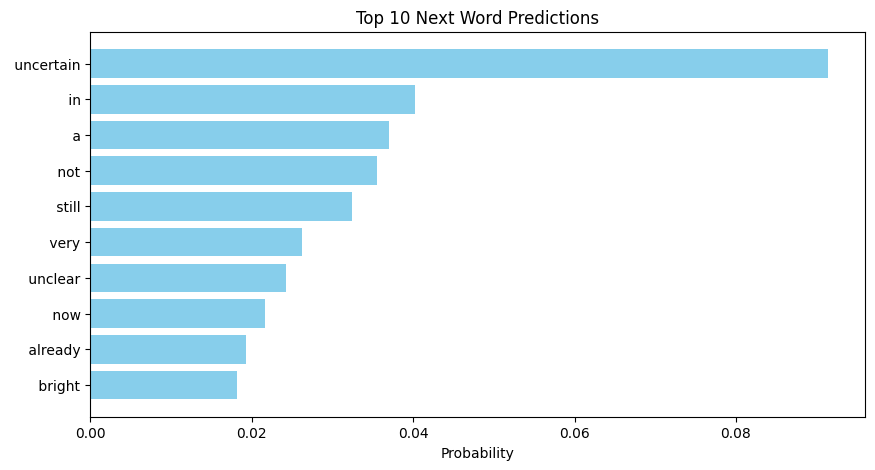

In [7]:
def plot_next_word_probabilities(prompt):
    
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    
    with torch.no_grad():
        outputs = model(inputs)
        logits = outputs.logits[:, -1, :]
        probs = torch.softmax(logits, dim=-1)

   
    top_k = torch.topk(probs, 10, dim=-1)
    words = [tokenizer.decode([i]) for i in top_k.indices[0]]
    probabilities = top_k.values[0].tolist()

   
    plt.figure(figsize=(10, 5))
    plt.barh(words, probabilities, color='skyblue')
    plt.xlabel('Probability')
    plt.title('Top 10 Next Word Predictions')
    plt.gca().invert_yaxis()
    plt.show()

plot_next_word_probabilities("The future of AI in healthcare is")
